In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import altair as alt


In [140]:
# importing washington post database from here: https://github.com/washingtonpost/data-police-shootings
df = pd.read_csv(
    "https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv",
    parse_dates=["date"],
    index_col="date",
)


In [141]:
df.replace({"race": {
    "W": "White, non-Hispanic",
    "B": "Black, non-Hispanic",
    "A": "Asian",
    "N": "Native American",
    "H": "Hispanic",
    "O": "Other",
    "None": "unknown"
}}, inplace=True
)


In [142]:
# create dataframe for just the unarmed victims
unarmed = df[df.armed == "unarmed"]

# group by year
killings_yearly = unarmed.groupby(
    [unarmed.index.year, unarmed.race]
).size(
).rename("Number Killed")


In [143]:
killings_yearly


date  race               
2015  Black, non-Hispanic    38
      Hispanic               21
      Native American         1
      Other                   4
      White, non-Hispanic    31
2016  Asian                   1
      Black, non-Hispanic    20
      Hispanic               13
      Native American         1
      White, non-Hispanic    29
2017  Asian                   1
      Black, non-Hispanic    21
      Hispanic               14
      Native American         2
      Other                   1
      White, non-Hispanic    31
2018  Asian                   1
      Black, non-Hispanic    22
      Hispanic                9
      White, non-Hispanic    25
2019  Asian                   4
      Black, non-Hispanic    12
      Hispanic               11
      Native American         1
      White, non-Hispanic    26
2020  Asian                   1
      Black, non-Hispanic    18
      Hispanic               10
      Native American         1
      White, non-Hispanic    26
2021  Black, n

## first attempt hacky/ugly charts

<AxesSubplot:title={'center':'Number of Unarmed People Killed by Police per Year'}, xlabel='Year', ylabel='Number Killed'>

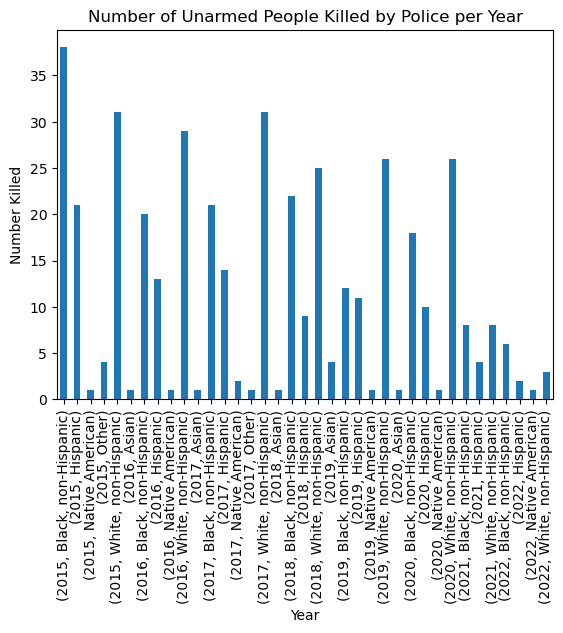

In [144]:
# plot
killings_yearly.plot(
    kind="bar",
    title="Number of Unarmed People Killed by Police per Year",
    xlabel="Year",
    ylabel="Number Killed",
)


<AxesSubplot:xlabel='date', ylabel='Count'>

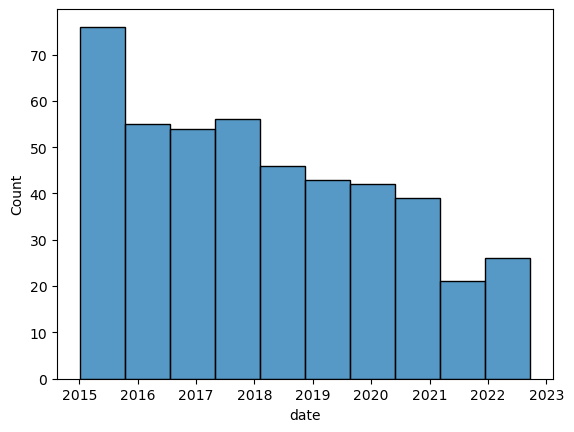

In [145]:
# seaborn plot
sns.histplot(
    data=unarmed,
    x=unarmed.index  # , y=killings_yearly
)


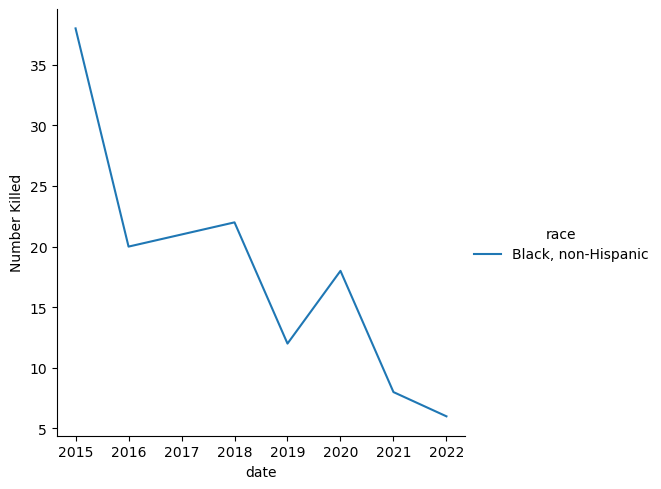

In [217]:
b_killings_yearly = killings_yearly[killings_yearly.index.get_level_values(
    1) == "Black, non-Hispanic"]
sns.relplot(
    data=b_killings_yearly, kind="line",
    x=b_killings_yearly.index.get_level_values(0), y=b_killings_yearly,
    hue=b_killings_yearly.index.get_level_values(1)
)


In [147]:
sns.catplot(
    data=killings_yearly, kind="bar",
    # hue=killings_yearly.index.get_level_values(1)
    x=killings_yearly.index.get_level_values(0), y=killings_yearly,
)


ValueError: cannot handle a non-unique multi-index!

In [158]:
# remove unknowns and convert to df with datetime

# killings_yearly.unstack(level=1) #turns it into columns of race
kyearly = pd.DataFrame(killings_yearly).reset_index()
# kyearly.date = pd.to_datetime(kyearly.date)
kyearly = kyearly[~kyearly.race.isin(["Other", "unknown"])]
kyearly


,date,race,Number Killed
0,2015,"Black, non-Hispanic",38
1,2015,Hispanic,21
2,2015,Native American,1
4,2015,"White, non-Hispanic",31
5,2016,Asian,1
6,2016,"Black, non-Hispanic",20
7,2016,Hispanic,13
8,2016,Native American,1
9,2016,"White, non-Hispanic",29
10,2017,Asian,1


## bar charts in altair

In [227]:
# alt.Chart(kyearly).mark_bar(opacity=0.2).encode(
#     x='date:O',
#     y=alt.Y('Number Killed:Q', stack=None),
#     color="race",
# )

# stacked bar chart - how to make not stacked?
bars = alt.Chart(kyearly).mark_bar().encode(
    x='date:O',
    y=alt.Y('Number Killed:Q', stack='zero'),
    color=alt.Color("race"),
    tooltip=['Number Killed', 'race']
).properties(
    title="Unarmed People Killed by Police",
    width=400,
    height=300
)

bars


alt.Chart(...)

In [174]:
# stacked bar chart - how to make not stacked?
bars = alt.Chart(kyearly).mark_bar().encode(
    x='date:O',
    y=alt.Y('Number Killed:Q', stack='zero'),
    color=alt.Color("race"),
    order=alt.Order('color_Category_sort_index:Q'),
).properties(
    title="Unarmed People Killed by Police",
    width=400,
    height=500
)  # .interactive()

bars

text = alt.Chart(kyearly).mark_text(dx=0, dy=6, color='white').encode(
    x='date:O',
    y=alt.Y('Number Killed:Q', stack='zero'),
    detail='race:N',
    # , format='.1f') # format is how the numbers are formatted eg .1f is one number after the  decimal point
    text=alt.Text('Number Killed:Q'),
    order=alt.Order('color_Category_sort_index:Q'),
)


bars + text

# why is it not lined up? because it was actually out of order -  required ordering  - why?  https://stackoverflow.com/questions/66453074/stacked-text-in-a-stacked-bar-chart-using-altair-mark-text


alt.LayerChart(...)

In [226]:
alt.Chart(kyearly).mark_bar().encode(
    x='date:O',
    y=alt.Y('Number Killed:Q', stack='normalize'),
    color=alt.Color("race"),
    tooltip=['Number Killed', 'race']
).properties(
    title="Unarmed people of each race killed by police as percent of all killed by police",
    width=400,
    height=300
)


alt.Chart(...)

## interactive altair charts

In [225]:
# from https://altair-viz.github.io/gallery/multiline_highlight.html
highlight = alt.selection(type='single', on='mouseover',
                          fields=['race'], nearest=True)

base = alt.Chart(kyearly).encode(
    x='date:O',
    y='Number Killed:Q',
    color='race:N',
    tooltip=['Number Killed', 'race']
)

points = base.mark_circle().encode(
    opacity=alt.value(10)
).add_selection(
    highlight
).properties(
    width=600
)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1), alt.value(3))
)

points + lines


alt.LayerChart(...)

In [240]:
# multiline tooltip
# from https://altair-viz.github.io/gallery/multiline_tooltip.html

# Create a selection that chooses the nearest point & selects based on x-value
# it wasn't on the line because it was doing interpolate basis which draws a nice curvy polynomial line between the points
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

# The basic line
line = alt.Chart(kyearly).mark_line().encode(
    x='date:O',
    y='Number Killed:Q',
    color='race:N',
    # tooltip=['Number Killed', 'race']
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(kyearly).mark_point().encode(
    x='date:O',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Number Killed:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(kyearly).mark_rule(color='gray').encode(
    x='date:O',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, text, rules
).properties(
    width=400, height=300
)




alt.LayerChart(...)

[multiline tooltip](https://altair-viz.github.io/gallery/multiline_tooltip.html) with [interactive legend](https://altair-viz.github.io/gallery/interactive_legend.html)



In [243]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

selection = alt.selection_multi(fields=['race'], bind='legend')

# The basic line
line = alt.Chart(kyearly).mark_line().encode(
    x='date:O',
    y='Number Killed:Q',
    color='race:N',
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    # tooltip=['Number Killed', 'race']
).add_selection(
    selection
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(kyearly).mark_point().encode(
    x='date:O',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Number Killed:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(kyearly).mark_rule(color='gray').encode(
    x='date:O',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, text, rules
).properties(
    width=400, height=300
)




alt.LayerChart(...)

## simple charts

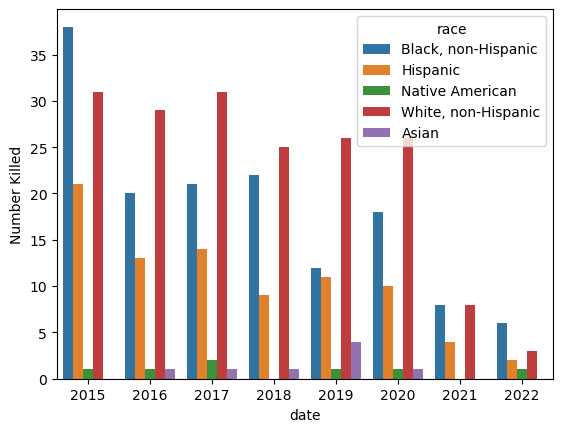

In [242]:
ax = sns.barplot(
    data=kyearly,
    x="date", y="Number Killed",
    hue="race"
)

sns.move_legend(ax, "upper right")

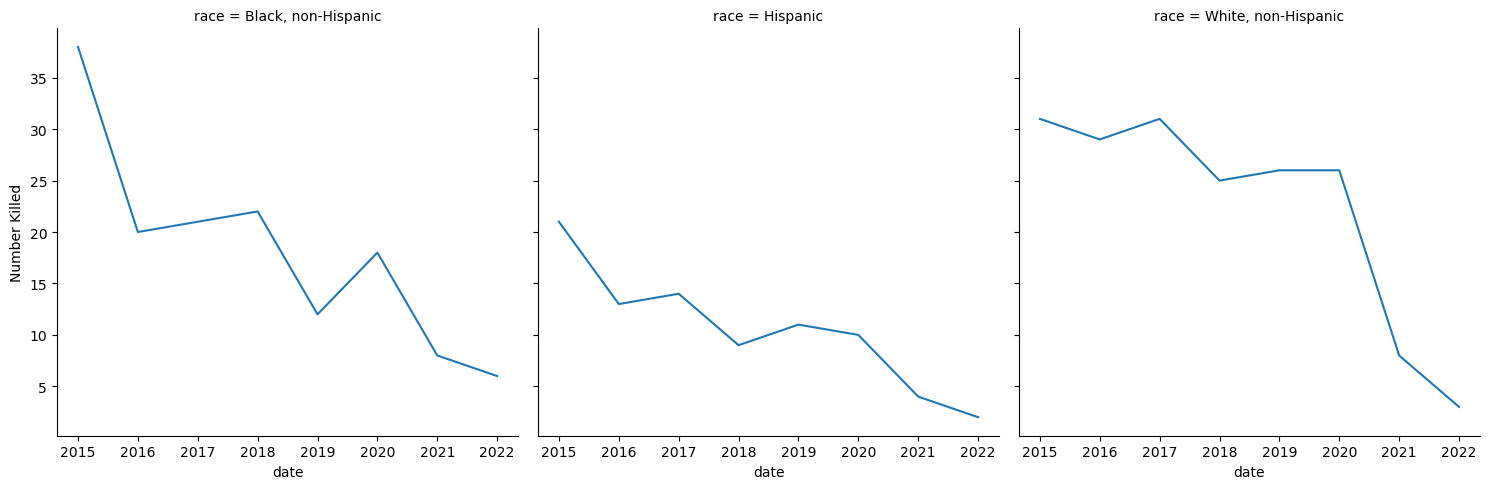

In [195]:
# fig, axes = plt.subplots(2, 3, figsize=(18, 10)) if want to change arrangement of grid can try one of these https://www.geeksforgeeks.org/multi-plot-grid-in-seaborn/#:~:text=In%20Seaborn%2C%20we%20will%20plot,with%20the%20help%20of%20matplotlib.&text=data%3A%20Tidy%20dataframe%20where%20each,each%20row%20is%20an%20observation.

sns.relplot(
    # ax=axes[0,1],
    kind="line",
    data=kyearly[~kyearly.race.isin(["Native American", "Asian"])],
    x="date", y="Number Killed",
    col="race",
)


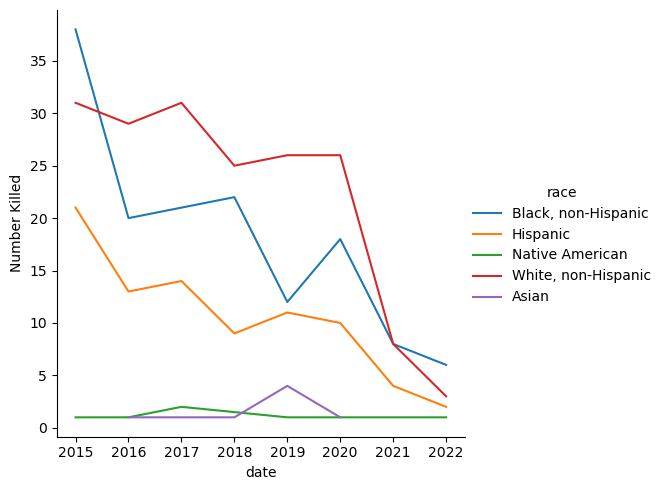

In [197]:

sns.relplot(
    kind="line",
    data=kyearly,  # [~kyearly.race.isin(["Native American", "Asian"])],
    x="date", y="Number Killed",
    hue="race",
)
